In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32

In [3]:
input_img = Input(shape=(784,))

In [4]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
decoded = Dense(784,activation='sigmoid')(encoded)

In [6]:
autoencoder = Model(input_img,decoded)

In [7]:
from keras.datasets import mnist
import numpy as np

In [8]:
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [10]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

In [13]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True
                ,validation_data=(x_test,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.3574 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2646 - val_loss: 0.2542
Epoch 3/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2432 - val_loss: 0.2292
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2202 - val_loss: 0.2092
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2039 - val_loss: 0.1960
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1927 - val_loss: 0.1866
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1844 - val_loss: 0.1794
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1777 - val_loss: 0.1733
Epoch 9/50
60000/60000 [==============================] - 2s 3

In [14]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [17]:
import matplotlib.pyplot as plt

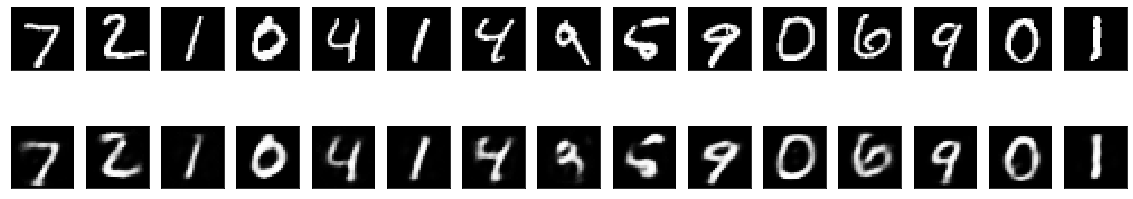

In [22]:
n = 15
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
